## Composite Analysis- Monthly averaged Precipitation, Cloud Cover, and Precipitable Water Anomalies over Africa with AMO (Atlantic Multi-Decadal Oscillation) Index

In [1]:
# import all necessary packages
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from clim680_function import xyticks
from climo_anoms_function import climo
from climo_anoms_function import anoms

In [2]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [3]:
#Climate index of choice: Atlantic Multidecadal Oscillation (AMO)
path='/homes/areed29/CLIM680_Fall2021/CLIM_INDICES/'
file='amon.us.data'
index_name='amo'

df=pd.read_table(path+file,skiprows=1,
                 header=None,delim_whitespace=True,
                 index_col=0,parse_dates=True,na_values=['-99.99','-99.990'])
df.drop(df.tail(5).index,inplace=True)


In [4]:
start_date=str(df.index[0])+'-'+str(df.columns[0])+'-01'
end_date=str(df.index[-1])+'-'+str(df.columns[-1])+'-01'
print(start_date)

1948-1-01


In [5]:
dates=pd.date_range(start=start_date,end=end_date,freq='MS')
dates

DatetimeIndex(['1948-01-01', '1948-02-01', '1948-03-01', '1948-04-01',
               '1948-05-01', '1948-06-01', '1948-07-01', '1948-08-01',
               '1948-09-01', '1948-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', length=876, freq='MS')

In [6]:
clim_index=df.T.unstack().values
ds_index=xr.DataArray(clim_index,
                      coords={'time':dates},
                              dims=['time'])        
ds_index=ds_index.to_dataset(name='amo')
ds_index

<xarray.Dataset>
Dimensions:  (time: 876)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-12-01
Data variables:
    amo      (time) object '-0.019' '-0.031' '0.024' ... 0.297 0.12 0.17

### Slice array to be consistent with precip data

<xarray.Dataset>
Dimensions:  (time: 501)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-09-01
Data variables:
    amo      (time) object '-0.200' '-0.159' '-0.236' ... '0.349' 0.433 0.304
<xarray.DataArray 'amo' (time: 501)>
array([-0.2  , -0.159, -0.236, -0.245, -0.125, -0.05 , -0.102, -0.123,
       -0.117, -0.095, -0.093, -0.067, -0.009, -0.086, -0.146, -0.008,
        0.122,  0.101,  0.043,  0.016, -0.015, -0.069, -0.204, -0.257,
       -0.184, -0.183, -0.002, -0.098, -0.087, -0.065, -0.097, -0.118,
       -0.039, -0.189, -0.14 , -0.009, -0.084, -0.081, -0.083, -0.185,
       -0.194, -0.187, -0.231, -0.311, -0.31 , -0.374, -0.42 , -0.383,
       -0.301, -0.107,  0.078,  0.056, -0.051, -0.057, -0.018, -0.161,
       -0.218, -0.198, -0.161, -0.006, -0.109, -0.091, -0.128, -0.16 ,
       -0.169, -0.327, -0.269, -0.229, -0.212, -0.347, -0.427, -0.321,
       -0.358, -0.332, -0.359, -0.404, -0.34 , -0.131, -0.156, -0.285,
       -0.251, -0.248, -0.298, -

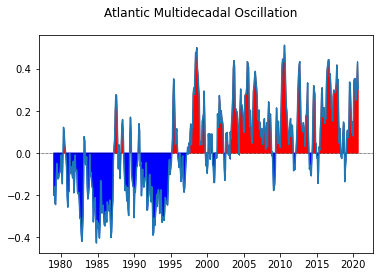

In [7]:
sliced_amo=ds_index.sel(time=slice(ds_index['time'][372],ds_index['time'][-4]))
print(sliced_amo)
#Warm AMO- above 0
#Cold AMO-below 0
amo_values = sliced_amo.amo
amo_float = amo_values.astype(float)
print(amo_float)
warm_amo=amo_float.where(amo_float>0.0)
cold_amo = amo_float.where(amo_float<0.0)
plt.fill_between(amo_float['time'],0,warm_amo,color='red')
plt.fill_between(amo_float['time'],cold_amo, 0,color='blue')
plt.axhline(0,color='black',linewidth=0.5,linestyle='dotted')
plt.axhline(0,color='black',linewidth=0.5,linestyle='dotted')
plt.plot(amo_float['time'],amo_float)
plt.suptitle('Atlantic Multidecadal Oscillation')
plt.savefig('/homes/areed29/CLIM680_Fall2021/final_project/figures/AMO_defined')

In [8]:
# Counts the number of months with Warm and Cold AMO
counts=[warm_amo.count(dim='time').values,
        cold_amo.count(dim='time').values]
print(counts)

[array(273), array(228)]


## Now, load in the precip dataset from ERA5

In [9]:
f= '/scratch/areed29/ERA5data/*.nc' #loads in Netcdf ERA5data
DS1 = xr.open_mfdataset(f) #opens the file
dataset =DS1.mean(dim='expver')
data_lat= DS1.latitude #latitudes
data_lon= DS1.longitude #longitudes
precip = dataset.tp
clouds = dataset.tcc
tcwv = dataset.tcwv
print(precip)

<xarray.DataArray 'tp' (time: 513, latitude: 401, longitude: 241)>
dask.array<mean_agg-aggregate, shape=(513, 401, 241), dtype=float32, chunksize=(513, 401, 241), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-09-01


### Select relevant precip values to match with AMO data

In [10]:
precip=precip.sel(time=slice(ds_index['time'][0],ds_index['time'][-4]))
precip
clouds = clouds.sel(time=slice(ds_index['time'][0],ds_index['time'][-4]))
tcwv = tcwv.sel(time=slice(ds_index['time'][0],ds_index['time'][-4]))

### Mask out only land values for data, then calculate the climatology

In [11]:
ds_mean = DS1.mean('expver')
mask = ds_mean.lsm #loads in land-sea mask
#Precipitation
land_ds_precip = precip.where(mask>0.5)
ds_climo_precip=climo(land_ds_precip)
#Now calculate land anomalies
ds_anoms_precip=anoms(land_ds_precip)
print(ds_anoms_precip)
#Clouds
land_ds_clouds = clouds.where(mask>0.5)
ds_climo_clouds = climo(land_ds_clouds)
#Now calculate land anomalies
ds_anoms_clouds = anoms(land_ds_clouds)
print(ds_anoms_clouds)
#Precipitable Water
land_ds_tcwv = tcwv.where(mask>0.5)
ds_climo_tcwv = climo(land_ds_tcwv)
#Now calculate land anomalies
ds_anoms_tcwv = anoms(land_ds_tcwv)
print(ds_anoms_tcwv)

<xarray.DataArray 'tp' (time: 501, latitude: 401, longitude: 241)>
dask.array<getitem, shape=(501, 401, 241), dtype=float32, chunksize=(1, 401, 241), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-09-01
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 11 12 1 2 3 4 5 6 7 8 9
<xarray.DataArray 'tcc' (time: 501, latitude: 401, longitude: 241)>
dask.array<getitem, shape=(501, 401, 241), dtype=float32, chunksize=(1, 401, 241), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-09-01
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 11 12 1 2 3 4 5 6 7

### Normalize the anomalies

In [12]:
ds_anoms_std_precip = ds_anoms_precip.std()
ds_anoms_norm_precip =ds_anoms_precip/ds_anoms_std_precip
print(ds_anoms_norm_precip)
ds_anoms_std_clouds = ds_anoms_clouds.std()
ds_anoms_norm_clouds =ds_anoms_clouds/ds_anoms_std_clouds
ds_anoms_std_tcwv = ds_anoms_tcwv.std()
ds_anoms_norm_tcwv =ds_anoms_tcwv/ds_anoms_std_tcwv

<xarray.DataArray 'tp' (time: 501, latitude: 401, longitude: 241)>
dask.array<truediv, shape=(501, 401, 241), dtype=float32, chunksize=(1, 401, 241), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-09-01
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 11 12 1 2 3 4 5 6 7 8 9


### Next, select the dates that match Warm and cold AMO

In [13]:
warm_amo_precip = ds_anoms_norm_precip.sel(time =warm_amo.dropna(dim='time')['time']).mean(dim='time').load()
cold_amo_precip= ds_anoms_norm_precip.sel(time=cold_amo.dropna(dim='time')['time']).mean(dim='time').load()
warm_amo_clouds = ds_anoms_norm_clouds.sel(time =warm_amo.dropna(dim='time')['time']).mean(dim='time').load()
cold_amo_clouds= ds_anoms_norm_clouds.sel(time=cold_amo.dropna(dim='time')['time']).mean(dim='time').load()
warm_amo_tcwv = ds_anoms_norm_tcwv.sel(time =warm_amo.dropna(dim='time')['time']).mean(dim='time').load()
cold_amo_tcwv= ds_anoms_norm_tcwv.sel(time=cold_amo.dropna(dim='time')['time']).mean(dim='time').load()
comp_precip = [warm_amo_precip,cold_amo_precip]
comp_clouds= [warm_amo_clouds,cold_amo_clouds]
comp_tcwv= [warm_amo_tcwv,cold_amo_tcwv]
print(comp_tcwv)
all_comps = [comp_clouds,comp_precip,comp_tcwv]
#print(all_comps)
#print(np.nanmin(warm_amo_precip),np.nanmax(warm_amo_precip))
#print(np.nanmin(cold_amo_precip), np.nanmax(cold_amo_precip))

[<xarray.DataArray 'tcwv' (latitude: 401, longitude: 241)>
array([[       nan,        nan,        nan, ..., 0.0960436 , 0.09823746,
        0.09979487],
       [       nan,        nan,        nan, ..., 0.09486811, 0.09567548,
        0.09715261],
       [       nan,        nan,        nan, ..., 0.09319346, 0.09401937,
        0.09462646],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0, <xarray.DataArray 'tcwv' (latitude: 401, longitude: 241)>
array([[        nan,         nan,         nan, ..., -0.11499944,
        -0.1176271 , -0.11949139],
       [        n

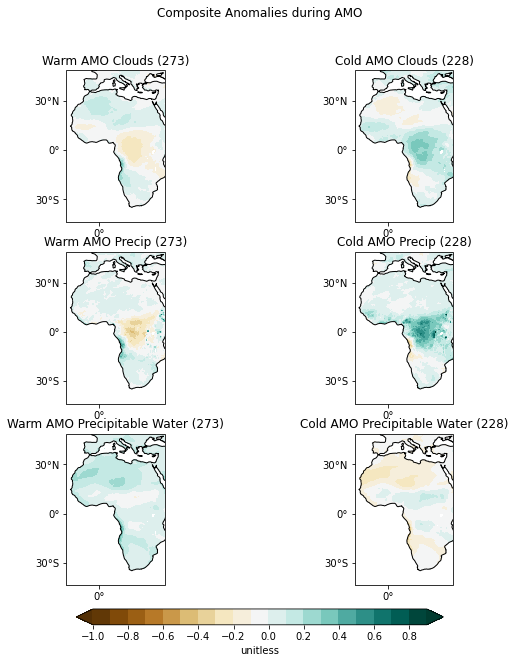

In [14]:
### Panel plots for Warm AMO and Cold AMO for each of the 3 variables
fig, axs = plt.subplots(nrows=3,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))
cloud_labels=['Warm AMO Clouds','Cold AMO Clouds']
precip_labels=['Warm AMO Precip','Cold AMO Precip']
tcwv_labels=['Warm AMO Precipitable Water','Cold AMO Precipitable Water']
clevs=np.arange(-1,1,0.1)
# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
clouds_axs=axs[0]
precip_axs=axs[1]
tcwv_axs=axs[2]
#Loop over the cloud composite array
for i,amo in enumerate(comp_clouds):
    
        data=comp_clouds[i]

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=comp_clouds[i]['longitude'])

        # Contour plot
        cs=clouds_axs[i].contourf(lons,comp_clouds[i]['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='BrBG',extend='both')

       # Longitude and latitude labels
        xyticks(clouds_axs[i],lons,comp_clouds[i]['latitude'])
        #Set extent for the plots
        clouds_axs[i].set_extent([-20,40,-40,45])
        
        # Title each subplot with the name of the composite
        clouds_axs[i].set_title(cloud_labels[i]+' ('+str(counts[i])+')')

        # Draw the coastines for each subplot
        clouds_axs[i].coastlines()
# Loop over the precip composite array
for i,amo in enumerate(comp_precip):

        data=comp_precip[i]

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=comp_precip[i]['longitude'])

        # Contour plot
        cs=precip_axs[i].contourf(lons,comp_precip[i]['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='BrBG',extend='both')

       # Longitude and latitude labels
        xyticks(precip_axs[i],lons,comp_precip[i]['latitude'])
        #Set extent for the plots
        precip_axs[i].set_extent([-20,40,-40,45])
        
        # Title each subplot with the name of the composite
        precip_axs[i].set_title(precip_labels[i]+' ('+str(counts[i])+')')

        # Draw the coastines for each subplot
        precip_axs[i].coastlines()
#Loop over the precipitable water composite array
for i,amo in enumerate(comp_tcwv):

        data=comp_tcwv[i]

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=comp_tcwv[i]['longitude'])

        # Contour plot
        cs=tcwv_axs[i].contourf(lons,comp_tcwv[i]['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='BrBG',extend='both')

       # Longitude and latitude labels
        xyticks(tcwv_axs[i],lons,comp_tcwv[i]['latitude'])
        #Set extent for the plots
        tcwv_axs[i].set_extent([-20,40,-40,45])
        
        # Title each subplot with the name of the composite
        tcwv_axs[i].set_title(tcwv_labels[i]+' ('+str(counts[i])+')')

        # Draw the coastines for each subplot
        tcwv_axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='unitless')

# Add a big title at the top
plt.suptitle('Composite Anomalies during AMO')
plt.savefig('/homes/areed29/CLIM680_Fall2021/final_project/figures/composite_anoms_allvars')

### Selecting a point to create a scatter point of AMO index vs. monthly averaged normalized Precipitation Anomalies

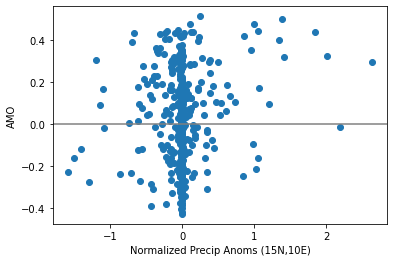

In [15]:
pt=ds_anoms_norm_precip.sel(latitude=15,longitude=10,method='nearest') #the Sahel region
plt.scatter(pt,amo_float)
plt.xlabel('Normalized Precip Anoms (15N,10E)')
plt.ylabel('AMO')

plt.axhline(0,color='gray')
plt.savefig('/homes/areed29/CLIM680_Fall2021/final_project/figures/AMO_precip_anoms_scatter_Sahel')

### Next, calculate the difference between the warm AMO composite and cold AMO composite

In [16]:
diff_precip=[warm_amo_precip- cold_amo_precip] 
#print(diff_precip)
diff_clouds = [warm_amo_clouds-cold_amo_clouds]
diff_tcwv = [warm_amo_tcwv-cold_amo_tcwv]
all_diff = [diff_clouds,diff_precip,diff_tcwv]
#print(all_diff)
print(diff_tcwv)

[<xarray.DataArray 'tcwv' (latitude: 401, longitude: 241)>
array([[       nan,        nan,        nan, ..., 0.21104303, 0.21586457,
        0.21928626],
       [       nan,        nan,        nan, ..., 0.20846047, 0.21023437,
        0.2134805 ],
       [       nan,        nan,        nan, ..., 0.20478049, 0.20659545,
        0.20792937],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... -49.5 -49.75 -50.0]


### Panel plots for Warm AMO and Cold AMO for each of the 3 variables

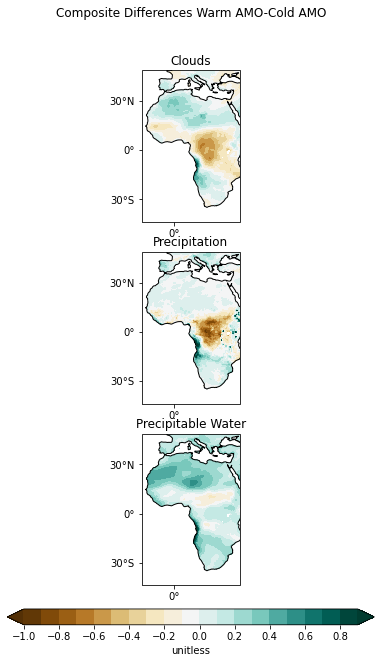

In [17]:
fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))
clevs=np.arange(-1,1,0.1)
# axs is a 2 dimensional array of `GeoAxes`.  
# Index axs for each variable
clouds_axs=axs[0]
precip_axs=axs[1]
tcwv_axs=axs[2]
#Loop over all of the phases and plot
#CLOUDS
data_clouds=diff_clouds[0]
# Add the cyclic point
data_clouds,lons=add_cyclic_point(data_clouds,coord=diff_clouds[0]['longitude'])
# Contour plot
cs=clouds_axs.contourf(lons,diff_clouds[0]['latitude'],data_clouds,clevs,transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')
# Longitude and latitude labels
xyticks(clouds_axs,lons,diff_clouds[0]['latitude'])
#Set extent for the plots
clouds_axs.set_extent([-20,40,-40,45])
# Title each subplot with the name of the composite
clouds_axs.set_title('Clouds')
# Draw the coastines for each subplot
clouds_axs.coastlines()
#PRECIPITATION
data_precip=diff_precip[0]
# Add the cyclic point
data_precip,lons=add_cyclic_point(data_precip,coord=diff_precip[0]['longitude'])
# Contour plot
cs=precip_axs.contourf(lons,diff_precip[0]['latitude'],data_precip,clevs,transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')
# Longitude and latitude labels
xyticks(precip_axs,lons,diff_precip[0]['latitude'])
#Set extent for the plots
precip_axs.set_extent([-20,40,-40,45])
# Title each subplot with the name of the composite
precip_axs.set_title('Precipitation')
# Draw the coastines for each subplot
precip_axs.coastlines()
#PRECIPTABLE WATER
data_tcwv=diff_tcwv[0]
# Add the cyclic point
data_tcwv,lons=add_cyclic_point(data_tcwv,coord=diff_tcwv[0]['longitude'])
# Contour plot
cs=tcwv_axs.contourf(lons,diff_tcwv[0]['latitude'],data_tcwv,clevs,transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')
# Longitude and latitude labels
xyticks(tcwv_axs,lons,diff_tcwv[0]['latitude'])
#Set extent for the plots
tcwv_axs.set_extent([-20,40,-40,45])
# Title each subplot with the name of the composite
tcwv_axs.set_title('Precipitable Water')
# Draw the coastines for each subplot
tcwv_axs.coastlines()
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.2)
# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])
# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='unitless')
# Add a big title at the top
plt.suptitle('Composite Differences Warm AMO-Cold AMO')
plt.savefig('/homes/areed29/CLIM680_Fall2021/final_project/figures/composite_anoms_differences_allvars')

### Calculate Significance Using the built-in Stats Function

In [18]:
p=0.05 # Pick a level of significance 

In [19]:
from scipy.stats import ttest_ind

warm_amo_precip_vals = ds_anoms_norm_precip.sel(time =warm_amo.dropna(dim='time')['time'])
cold_amo_precip_vals= ds_anoms_norm_precip.sel(time=cold_amo.dropna(dim='time')['time'])
warm_amo_clouds_vals = ds_anoms_norm_clouds.sel(time=warm_amo.dropna(dim='time')['time'])
cold_amo_clouds_vals = ds_anoms_norm_clouds.sel(time=cold_amo.dropna(dim='time')['time'])
warm_amo_tcwv_vals = ds_anoms_norm_tcwv.sel(time=warm_amo.dropna(dim='time')['time'])
cold_amo_tcwv_vals = ds_anoms_norm_tcwv.sel(time=cold_amo.dropna(dim='time')['time'])

tstat_precip,pval_precip=ttest_ind(warm_amo_precip_vals, cold_amo_precip_vals,equal_var = False)
tstat_clouds,pval_clouds=ttest_ind(warm_amo_clouds_vals, cold_amo_clouds_vals,equal_var = False)
tstat_tcwv,pval_tcwv=ttest_ind(warm_amo_tcwv_vals, cold_amo_tcwv_vals,equal_var = False)

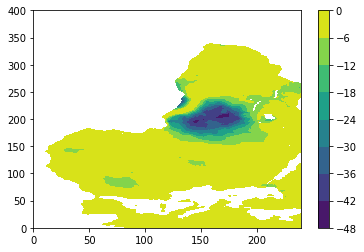

In [20]:
plt.contourf(np.log(pval_clouds))
plt.colorbar()

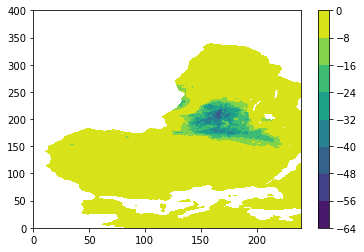

In [21]:
plt.contourf(np.log(pval_precip))
plt.colorbar()

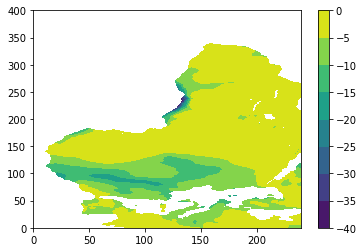

In [22]:
plt.contourf(np.log(pval_tcwv))
plt.colorbar()

### Next, make a mask where the value is significant

In [23]:
mask_diff_clouds=diff_clouds[0].where(pval_clouds<p)
mask_diff_precip=diff_precip[0].where(pval_precip<p)
mask_diff_tcwv=diff_tcwv[0].where(pval_tcwv<p)

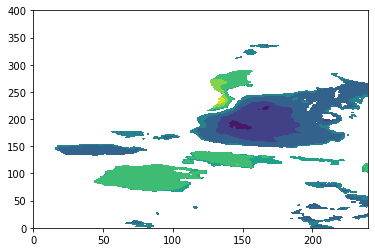

In [24]:
plt.contourf(mask_diff_clouds)

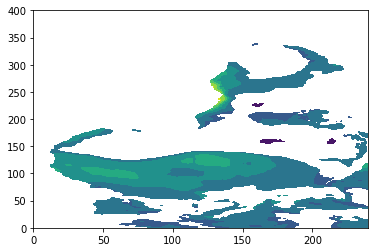

In [25]:
plt.contourf(mask_diff_tcwv)

### Finally, plot the differences between composites, and also mark where it is significant

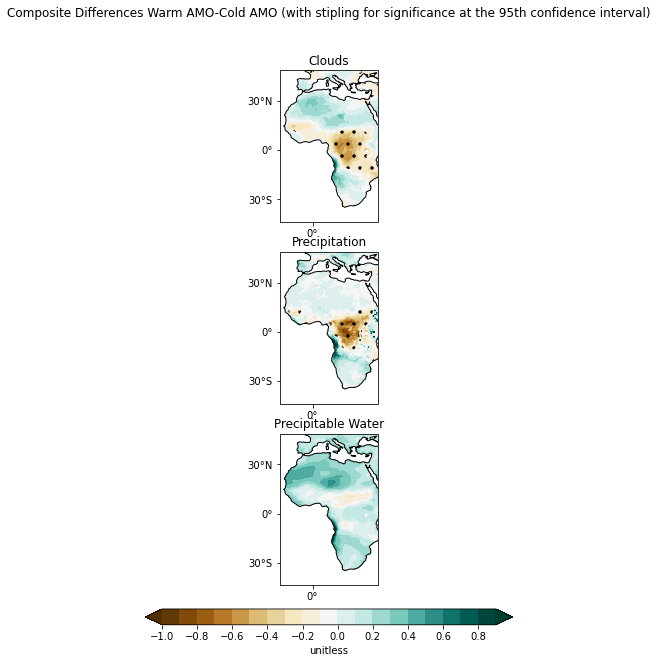

In [26]:
fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))
hatch_levs=[0]
clevs=np.arange(-1,1,0.1)
# axs is a 2 dimensional array of `GeoAxes`.  
# Index axs for each variable
clouds_axs=axs[0]
precip_axs=axs[1]
tcwv_axs=axs[2]
#Loop over all of the phases and plot
#CLOUDS
data_clouds=diff_clouds[0]
# Add the cyclic point
data_clouds,lons=add_cyclic_point(data_clouds,coord=diff_clouds[0]['longitude'])
mask_data_clouds,lons=add_cyclic_point(mask_diff_clouds,coord=diff_clouds[0]['longitude'])
# Contour plot
cs=clouds_axs.contourf(lons,diff_clouds[0]['latitude'],data_clouds,clevs,transform = ccrs.PlateCarree(),cmap='BrBG',extend='both') #contours the difference array
clouds_axs.contourf(lons,diff_clouds[0]['latitude'],mask_data_clouds,[0,1],transform = ccrs.PlateCarree(),colors='None',
hatches=['.',''],extend='both',alpha=0) #contours the mask
# Longitude and latitude labels
xyticks(clouds_axs,lons,diff_clouds[0]['latitude'])
#Set extent for the plots
clouds_axs.set_extent([-20,40,-40,45])
# Title each subplot with the name of the composite
clouds_axs.set_title('Clouds')
# Draw the coastines for each subplot
clouds_axs.coastlines()
#PRECIPITATION
data_precip=diff_precip[0]
# Add the cyclic point
data_precip,lons=add_cyclic_point(data_precip,coord=diff_precip[0]['longitude'])
mask_data_precip,lons=add_cyclic_point(mask_diff_precip,coord=diff_precip[0]['longitude'])
# Contour plot
cs=precip_axs.contourf(lons,diff_precip[0]['latitude'],data_precip,clevs,transform = ccrs.PlateCarree(),cmap='BrBG',extend='both') #contours the difference array
precip_axs.contourf(lons,diff_precip[0]['latitude'],mask_data_precip,[0,1],transform = ccrs.PlateCarree(),colors='None',
hatches=['.',''],extend='both',alpha=0) #contours the mask
# Longitude and latitude labels
xyticks(precip_axs,lons,diff_precip[0]['latitude'])
#Set extent for the plots
precip_axs.set_extent([-20,40,-40,45])
# Title each subplot with the name of the composite
precip_axs.set_title('Precipitation')
# Draw the coastines for each subplot
precip_axs.coastlines()
#PRECIPTABLE WATER
data_tcwv=diff_tcwv[0]
# Add the cyclic point
data_tcwv,lons=add_cyclic_point(data_tcwv,coord=diff_tcwv[0]['longitude'])
mask_data_tcwv,lons=add_cyclic_point(mask_diff_tcwv,coord=diff_tcwv[0]['longitude'])
# Contour plot
cs=tcwv_axs.contourf(lons,diff_tcwv[0]['latitude'],data_tcwv,clevs,transform = ccrs.PlateCarree(),cmap='BrBG',extend='both') #contour the difference array
tcwv_axs.contourf(lons,diff_tcwv[0]['latitude'],mask_data_tcwv,[0,1],transform = ccrs.PlateCarree(),colors='None',
hatches=['.',''],extend='both',alpha=0) #contours the mask
# Longitude and latitude labels
xyticks(tcwv_axs,lons,diff_tcwv[0]['latitude'])
#Set extent for the plots
tcwv_axs.set_extent([-20,40,-40,45])
# Title each subplot with the name of the composite
tcwv_axs.set_title('Precipitable Water')
# Draw the coastines for each subplot
tcwv_axs.coastlines()
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.2)
# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])
# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='unitless')
# Add a big title at the top
plt.suptitle('Composite Differences Warm AMO-Cold AMO (with stipling for significance at the 95th confidence interval)')
plt.savefig('/homes/areed29/CLIM680_Fall2021/final_project/figures/composite_anoms_differences_significance_allvars',bbox_inches='tight')